# Clustering Models

**Objective:** Utilize clustering algorithms to segment customers based on their purchase patterns. Focus on applying various clustering techniques to uncover hidden patterns and optimize customer segmentation.

### Document Structure:
1. Data Preparation
	- Import dataset, libraries, and metrics
	- Selecting columns and scaling data
2. Applying Clustering Algorithms
	- K-Means Clustering
	- Hierarchical Clustering
	- DBSCAN
3. Models Comparison

## Data Preparation

### Import dataset, libraries, and metrics

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram

from collections import Counter
from itertools import product

In [39]:
df = pd.read_csv(r"data.csv")
df.head(10)

,customer_id,recency,frequency,monetary,furniture_sales,office_supplies_sales,technology_sales,business_orders,home_orders,fall_sales,spring_sales,summer_sales,winter_sales,state_or_province
0,2,583,1,5.76,0.00,5.76,0.00,1,0,0.00,5.76,0.00,0.00,Illinois
1,3,184,4,5250.20,0.00,2150.64,3099.56,4,0,2052.76,0.00,3197.44,0.00,Washington
2,5,599,2,6128.40,6011.76,116.64,0.00,0,2,0.00,116.64,0.00,6011.76,California
3,6,368,2,3615.80,0.00,1552.04,2063.76,0,2,0.00,1443.84,0.00,2171.96,California
4,7,428,1,233.32,0.00,233.32,0.00,0,1,233.32,0.00,0.00,0.00,Massachusetts
5,8,372,1,704.90,704.90,0.00,0.00,0,1,0.00,0.00,0.00,704.90,New Hampshire
6,9,372,1,2294.80,2294.80,0.00,0.00,0,1,0.00,0.00,0.00,2294.80,New Jersey
7,10,820,1,217.98,0.00,217.98,0.00,0,1,217.98,0.00,0.00,0.00,New Jersey
8,11,1235,1,208.56,208.56,0.00,0.00,0,1,0.00,0.00,208.56,0.00,New Jersey
9,12,677,1,87.84,0.00,87.84,0.00,0,1,0.00,0.00,0.00,87.84,Rhode Island


### Selecting columns and scaling data

In [40]:
# Here's a list of columns that perform best in clustering algorithms after a trial-and-error process.

cols = [
    # "customer_id",
    "recency",
    "frequency",
    "monetary",
    "furniture_sales",
    "office_supplies_sales",
    "technology_sales",
    "business_orders",
    "home_orders",
    # "fall_sales",
    # "spring_sales",
    # "summer_sales",
    # "winter_sales",
    # "state_or_province"
]

In [41]:
df_filtered = df[cols]
scaler = StandardScaler()
data = scaler.fit_transform(df_filtered)
data = pd.DataFrame(data, columns=df_filtered.columns)

## Applying Clustering Algorithms

### K-Means

In [42]:
# Code to estimate inertia and silhouette score metrics for different number of clusters
clusters = list(range(2, 21))
results_kmean = []

for num in clusters:
    kmean_model = KMeans(n_clusters=num, n_init="auto", random_state=123)
    kmean_model.fit(data)

    inertia_value = kmean_model.inertia_
    silhouette_value = silhouette_score(data, kmean_model.labels_)
    
    results_kmean.append([num, inertia_value, silhouette_value])

kmeans_df = pd.DataFrame(results_kmean, columns=["n_clusters", "inertia_score", "silhouette_score"])

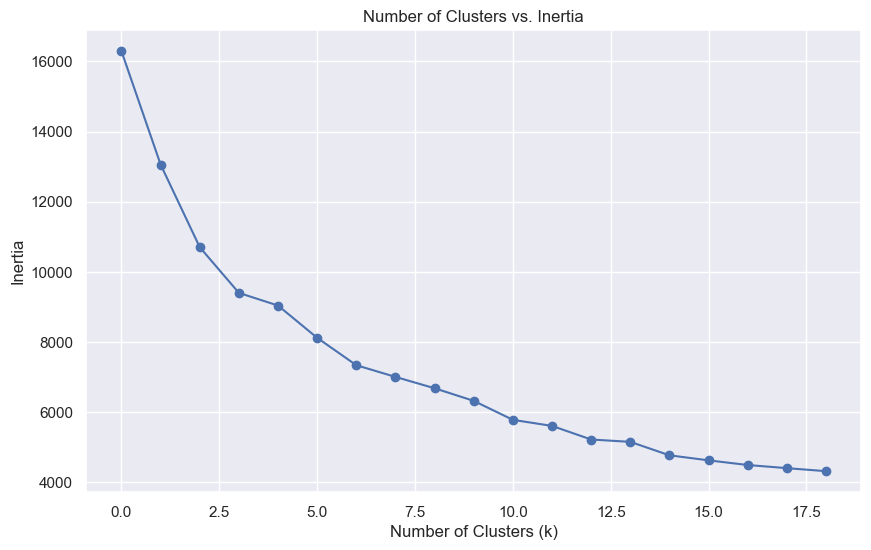

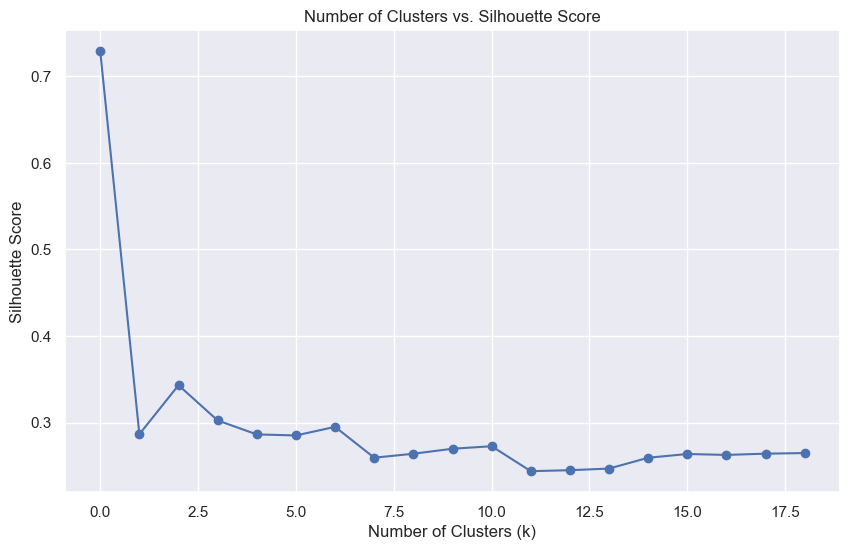

In [43]:
plt.figure(figsize=(10, 6))
kmeans_df["inertia_score"].plot(marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Number of Clusters vs. Inertia")
plt.show;

plt.figure(figsize=(10, 6))
kmeans_df["silhouette_score"].plot(marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Number of Clusters vs. Silhouette Score")
plt.show;

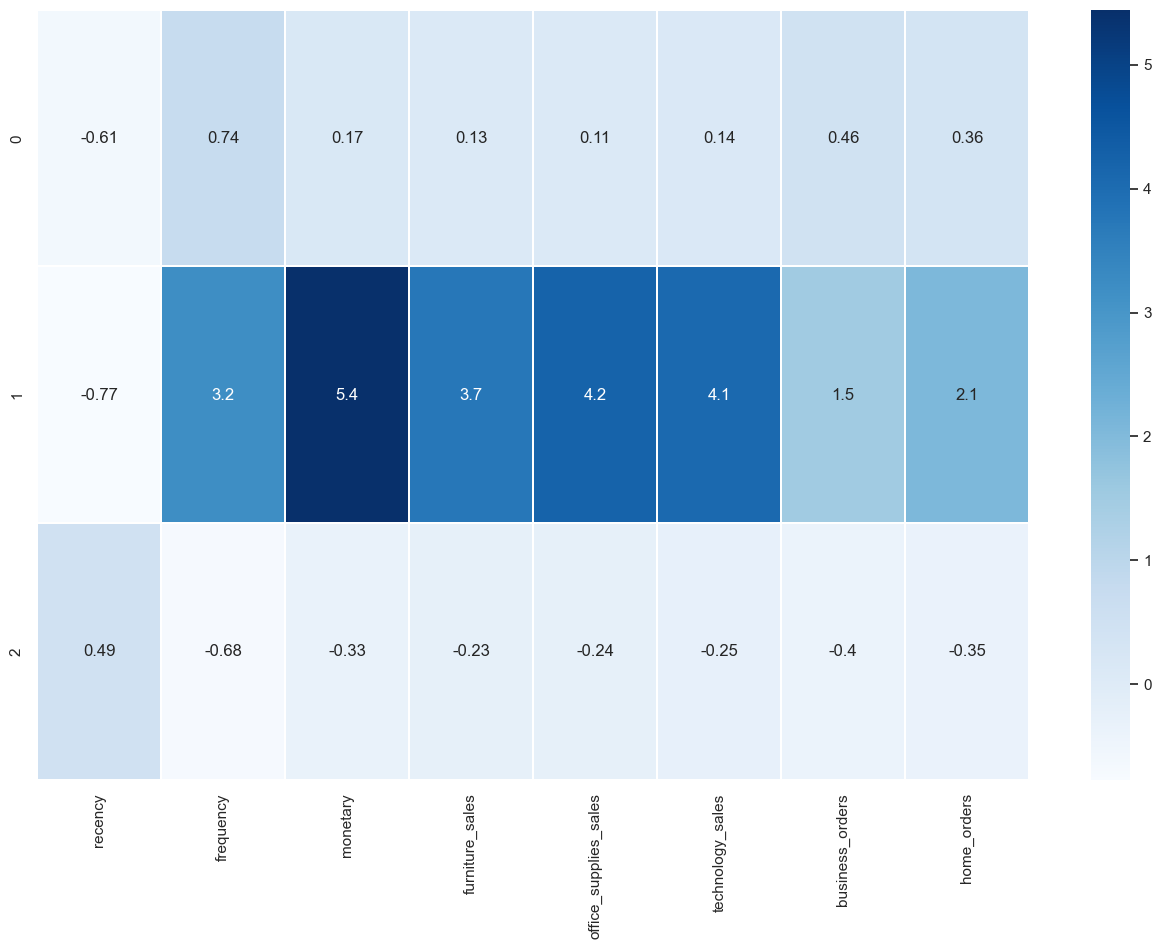

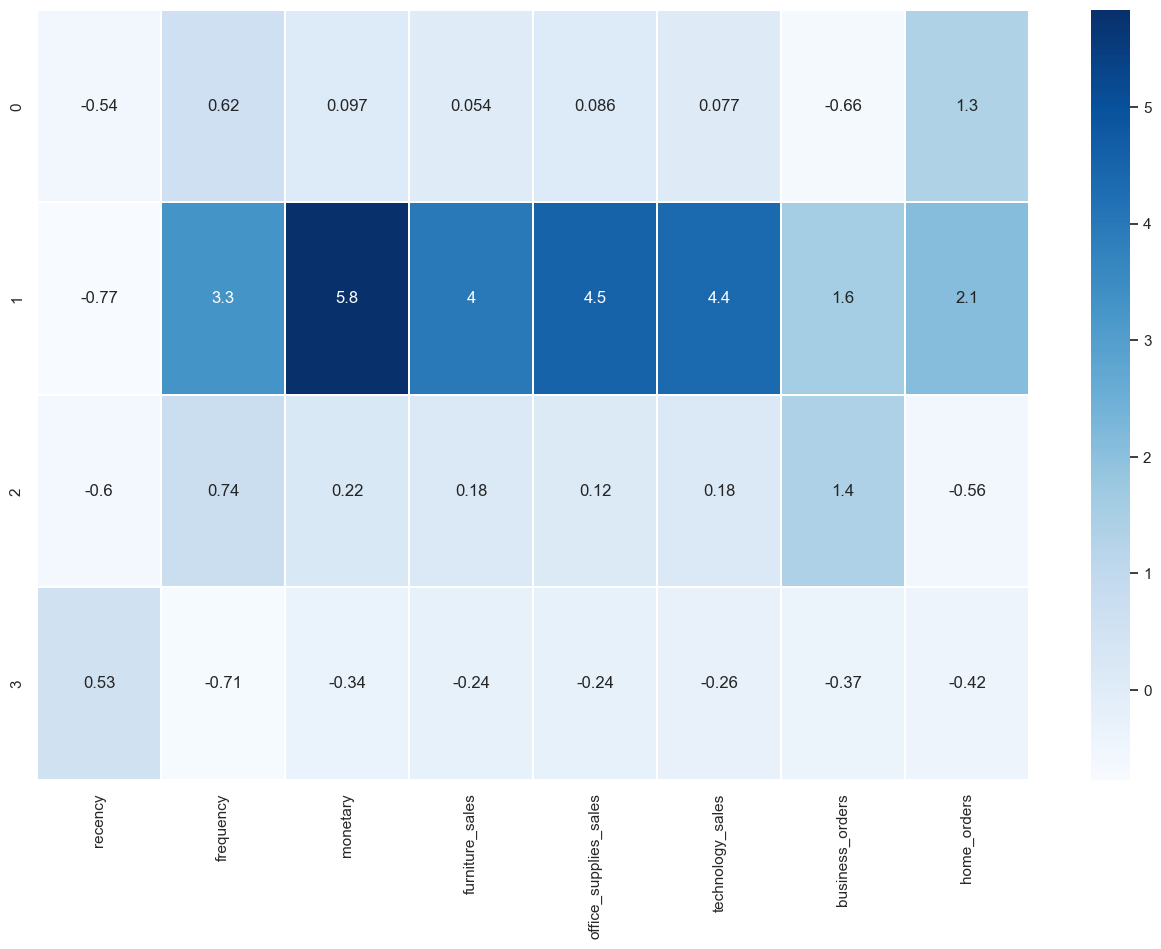

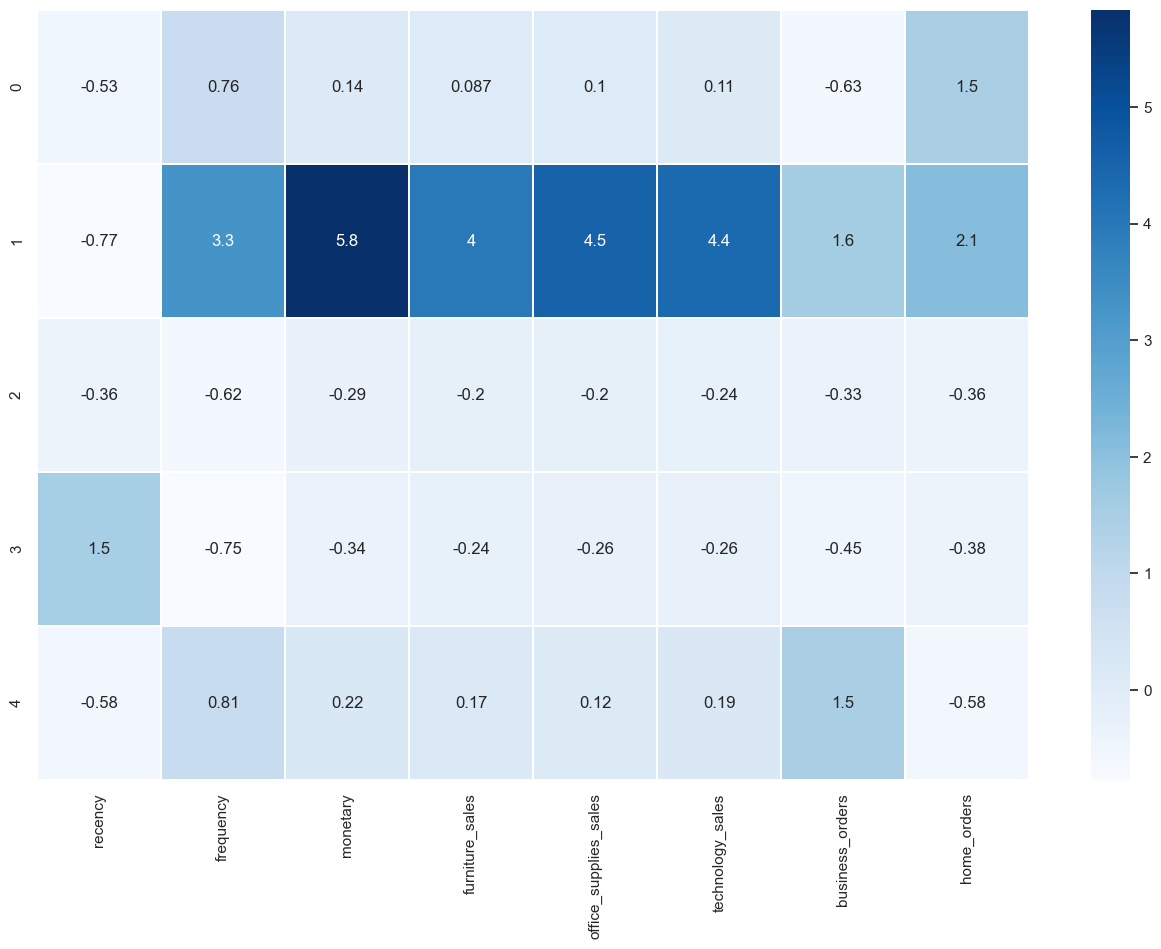

In [44]:
# Evaluating models with the help of heatmap
kmeans_customers = []

for num in [3, 4, 5]:
    kmean_model = KMeans(n_clusters=num, n_init="auto", random_state=123).fit(data)
    heatmap = pd.DataFrame(kmean_model.cluster_centers_, columns=df_filtered.columns)
    
    plt.figure(figsize=(16, 10))
    sns.heatmap(heatmap, annot=True, cmap="Blues", linewidths=0.1);

    kmeans_customers.append([f"n_clusters: {num}", dict(Counter(kmean_model.labels_))])

In [45]:
# Distribution of customer for each k_mean model 
kmeans_customers

[['n_clusters: 3', {2: 1507, 0: 1142, 1: 54}],
 ['n_clusters: 4', {3: 1410, 2: 623, 0: 623, 1: 47}],
 ['n_clusters: 5', {2: 887, 4: 580, 3: 643, 0: 546, 1: 47}]]

In [46]:
# Selecting the best number of clusters and mapping values
kmean_model = KMeans(n_clusters=4, n_init="auto", random_state=123).fit(data)

kmeans_categories = {
    0: "Moderate Engagement, High Home Orders",
    1: "High-Value, Very Frequent Buyers",
    2: "Moderate Engagement, High Business Orders",
    3: "Low-Value, Infrequent Buyers with Poor Recency"
}

kmean_category = pd.DataFrame(kmean_model.labels_, columns=["kmean_category"])
kmean_category["kmean_category"] = kmean_category["kmean_category"].map(kmeans_categories)

pd.concat([data, kmean_category], axis=1).groupby("kmean_category").mean().reset_index()

,kmean_category,recency,frequency,monetary,furniture_sales,office_supplies_sales,technology_sales,business_orders,home_orders
0,"High-Value, Very Frequent Buyers",-0.770862,3.305462,5.835882,3.997456,4.532254,4.388352,1.563920,2.085857
1,"Low-Value, Infrequent Buyers with Poor Recency",0.532591,-0.712306,-0.335861,-0.235548,-0.241832,-0.260023,-0.371994,-0.415068
2,"Moderate Engagement, High Business Orders",-0.602741,0.742834,0.222672,0.177142,0.119450,0.180237,1.382351,-0.560671
3,"Moderate Engagement, High Home Orders",-0.544488,0.619919,0.097196,0.054387,0.085955,0.077195,-0.658424,1.342709


### Hierarchical Clustering

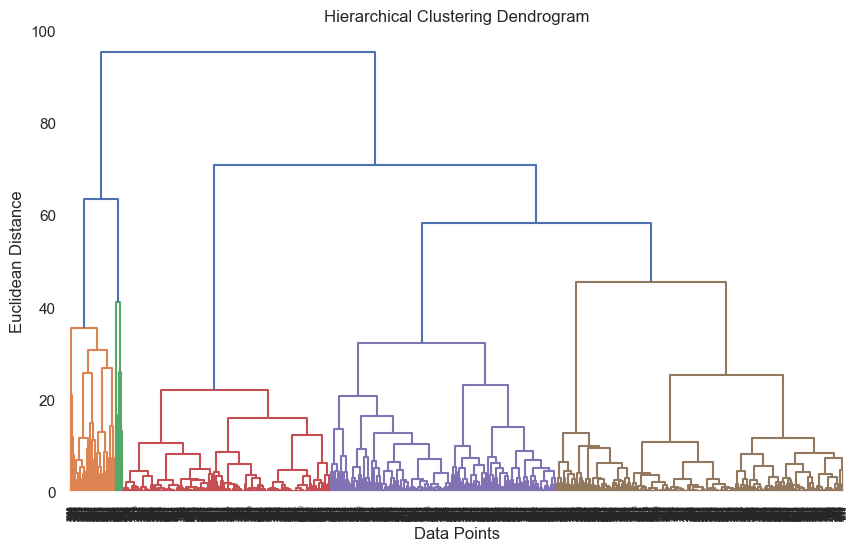

In [47]:
plt.figure(figsize=(10, 6))
linkage_matrix = linkage(data, method="ward")
dendrogram_info = dendrogram(linkage_matrix, color_threshold=54)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance");

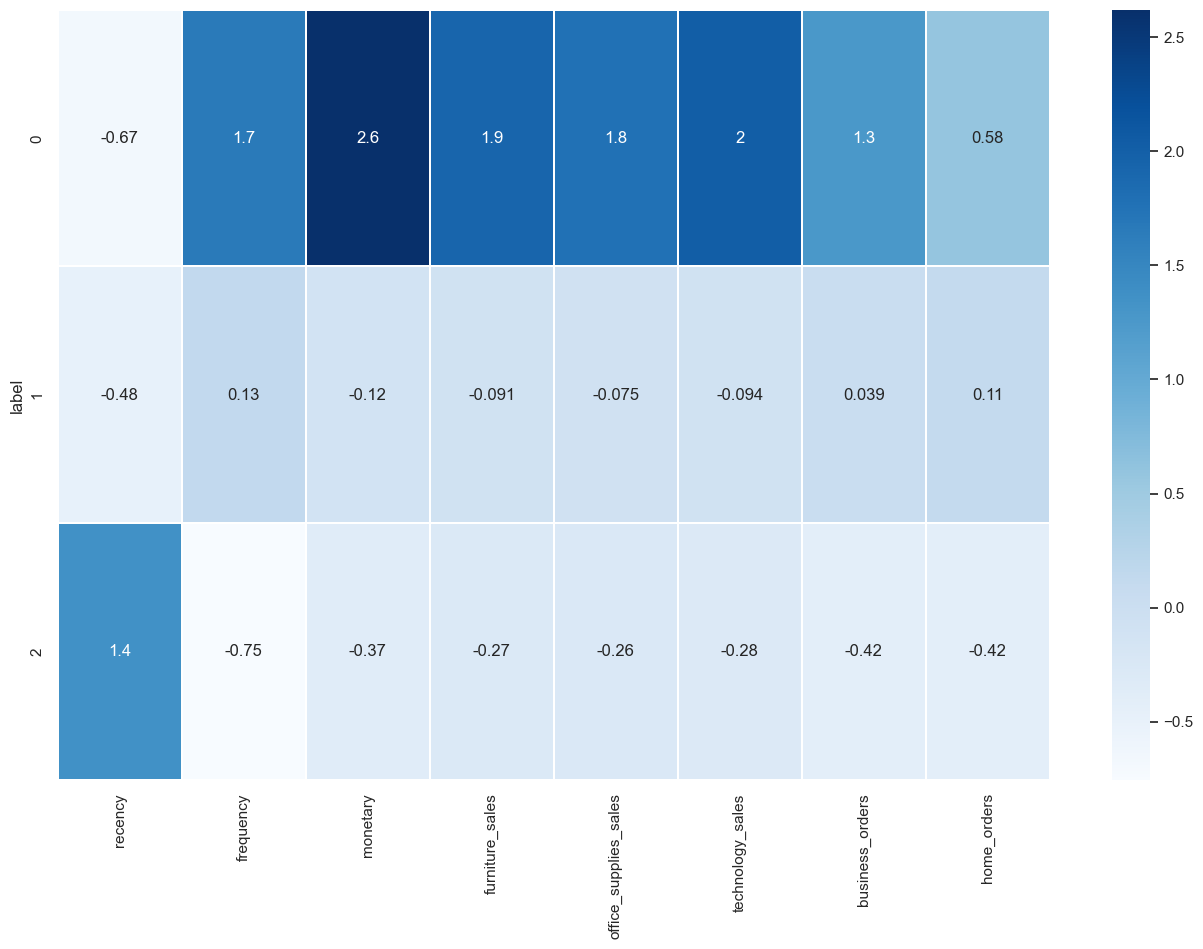

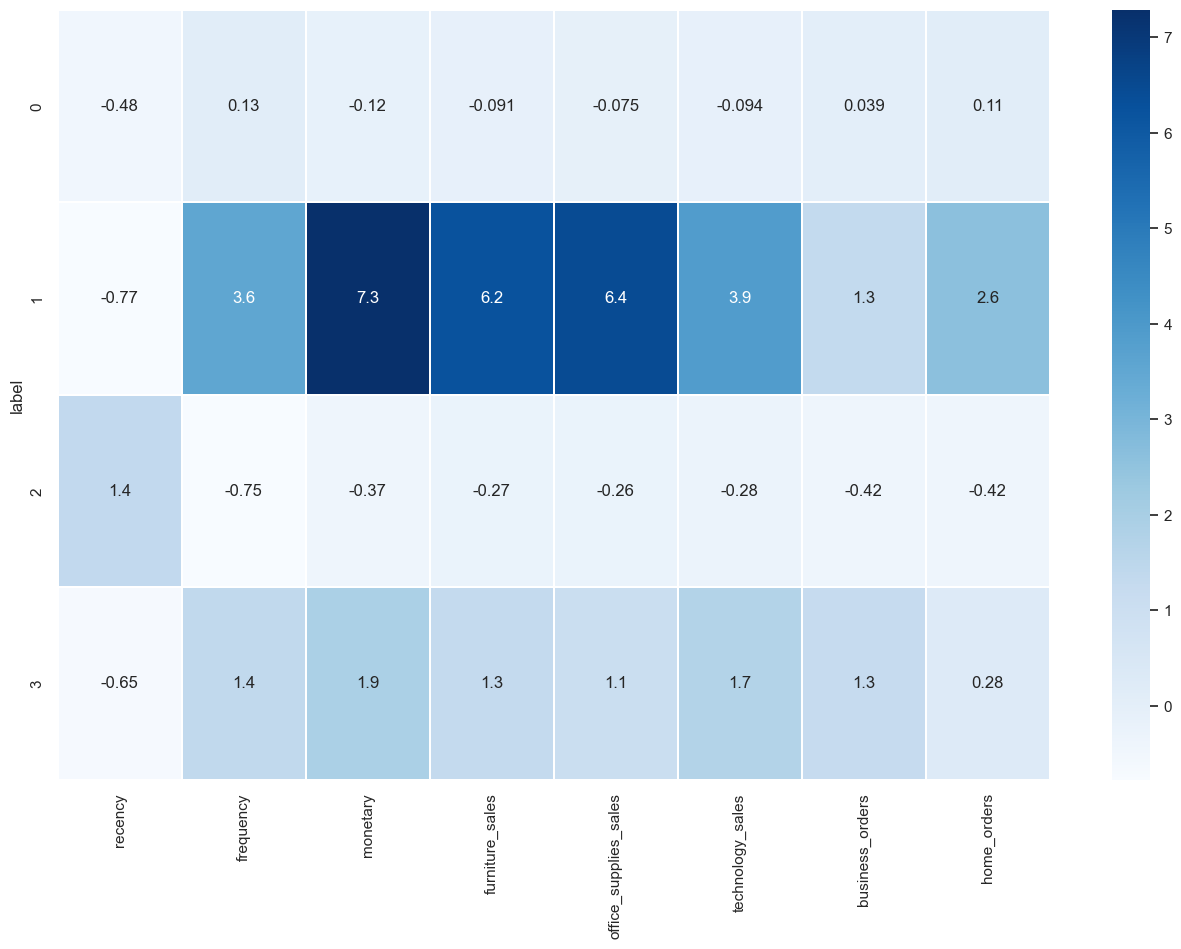

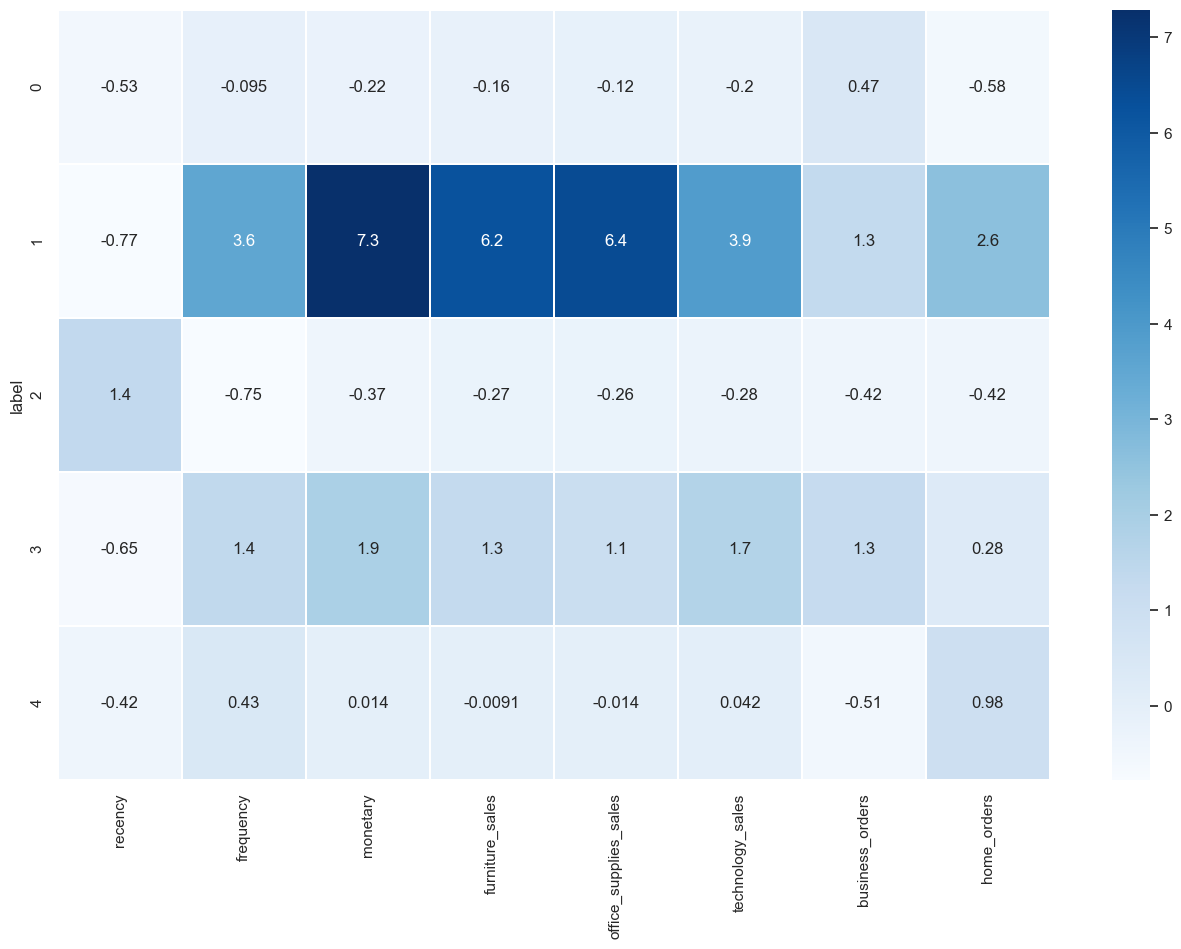

In [48]:
hierarchy_customers = []

for num in [3, 4, 5]:
    agg_model = AgglomerativeClustering(n_clusters=num).fit(data)
    
    labels = pd.Series(agg_model.labels_, name="label")
    heatmap_df = pd.concat([data, labels], axis=1).groupby("label").mean()

    plt.figure(figsize=(16, 10))
    sns.heatmap(heatmap_df, annot=True, cmap="Blues", linewidths=0.1);

    hierarchy_customers.append([f"n_clusters: {num}", dict(Counter(agg_model.labels_))])

In [49]:
hierarchy_customers

[['n_clusters: 3', {2: 728, 1: 1790, 0: 185}],
 ['n_clusters: 4', {2: 728, 0: 1790, 3: 161, 1: 24}],
 ['n_clusters: 5', {2: 728, 0: 1002, 4: 788, 3: 161, 1: 24}]]

In [50]:
agg_model = AgglomerativeClustering(n_clusters=5).fit(data)

agg_categories = {
    0: "Slightly Engaged Buyers with Moderate Business Orders",
    1: "Very High-Value, Extremely Frequent Buyers",
    2: "Disengaged Buyers with Very Poor Recency",
    3: "High-Value, Frequent Buyers",
    4: "Slightly Engaged Buyers with Moderate Home Orders"
}

agg_category = pd.DataFrame(agg_model.labels_, columns=["agg_category"])
agg_category["agg_category"] = agg_category["agg_category"].map(agg_categories)

pd.concat([data, agg_category], axis=1).groupby("agg_category").mean().reset_index()

,agg_category,recency,frequency,monetary,furniture_sales,office_supplies_sales,technology_sales,business_orders,home_orders
0,Disengaged Buyers with Very Poor Recency,1.362064,-0.754164,-0.370524,-0.266955,-0.264891,-0.281611,-0.417309,-0.415996
1,"High-Value, Frequent Buyers",-0.651671,1.386359,1.923097,1.291082,1.070603,1.740567,1.255367,0.275653
2,Slightly Engaged Buyers with Moderate Business...,-0.534610,-0.095259,-0.224993,-0.155495,-0.122892,-0.201180,0.473942,-0.578550
3,Slightly Engaged Buyers with Moderate Home Orders,-0.421875,0.426130,0.013504,-0.009098,-0.014141,0.041729,-0.513736,0.984022
4,"Very High-Value, Extremely Frequent Buyers",-0.772769,3.561923,7.288536,6.227271,6.448114,3.895088,1.317556,2.615123


### DBSCAN

In [51]:
# Tuning hyperparams for DBSCAN

dbscan_result = []
eps_values = np.array(range(1, 31)) / 10
min_samples_values = list(range(2, 11))

for eps, min_sample in list(product(eps_values, min_samples_values)):
    dbscan = DBSCAN(eps=eps, min_samples=min_sample).fit(data)
    labels = dbscan.labels_

    n_clusters = len(set(labels)) - 1
    n_noise = Counter(dbscan.labels_)[-1]

    if n_clusters > 1: silhouette = silhouette_score(data, labels).round(2)
    else: silhouette = None
    
    dbscan_result.append([eps, min_sample, n_clusters, n_noise, silhouette])

dbscan_df = pd.DataFrame(dbscan_result, columns=["eps", "min_samples", "n_clusters", "noise_points", "silhouette_score"])

In [52]:
dbscan_df_filtered = (
    dbscan_df.sort_values(["n_clusters", "silhouette_score"], ascending=[True, False])
    .groupby("n_clusters").head(1).sort_values("silhouette_score", ascending=False)
).head(4)

dbscan_df_filtered = dbscan_df_filtered.sort_values("n_clusters").query("n_clusters > 2")
dbscan_df_filtered

,eps,min_samples,n_clusters,noise_points,silhouette_score
154,1.8,3,3,76,0.60
225,2.6,2,4,41,0.64
243,2.8,2,5,37,0.61


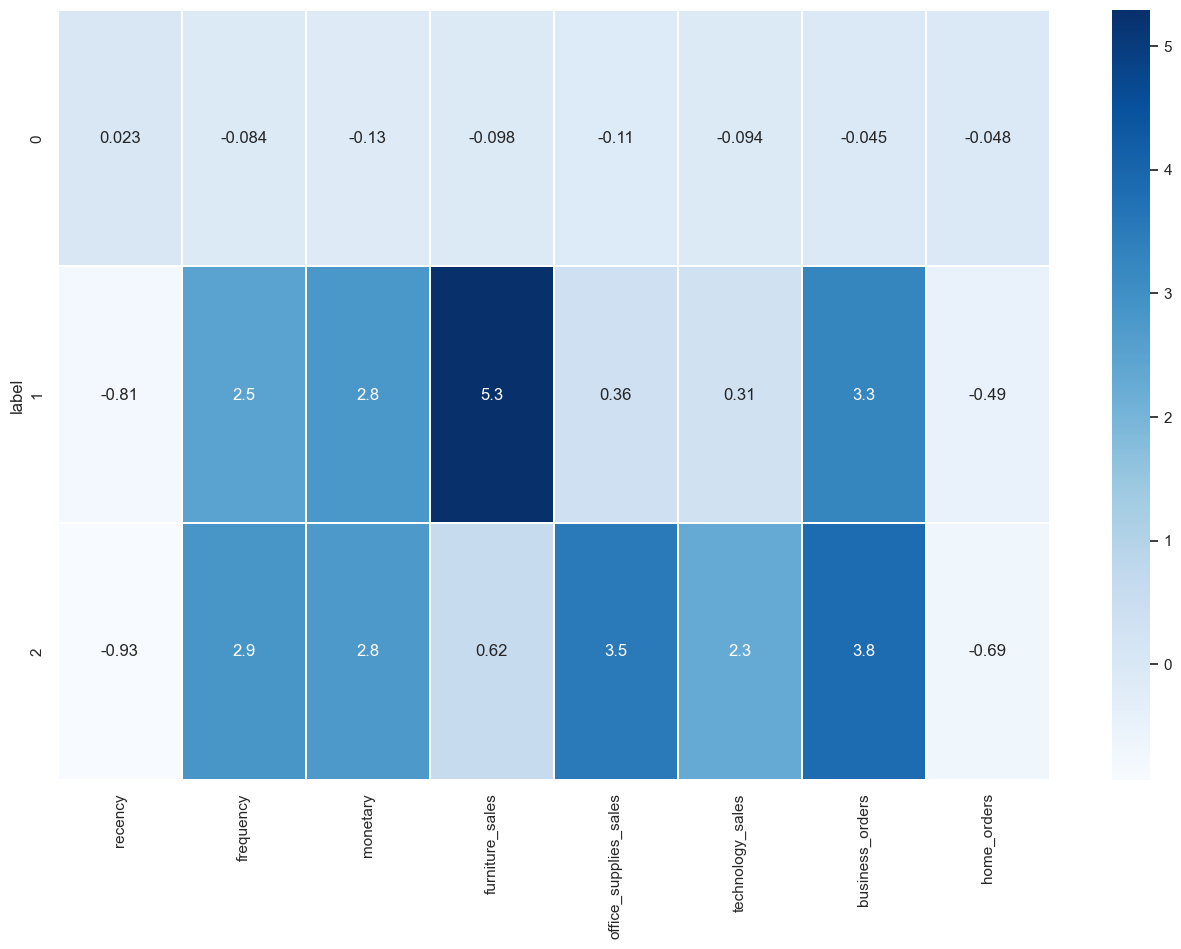

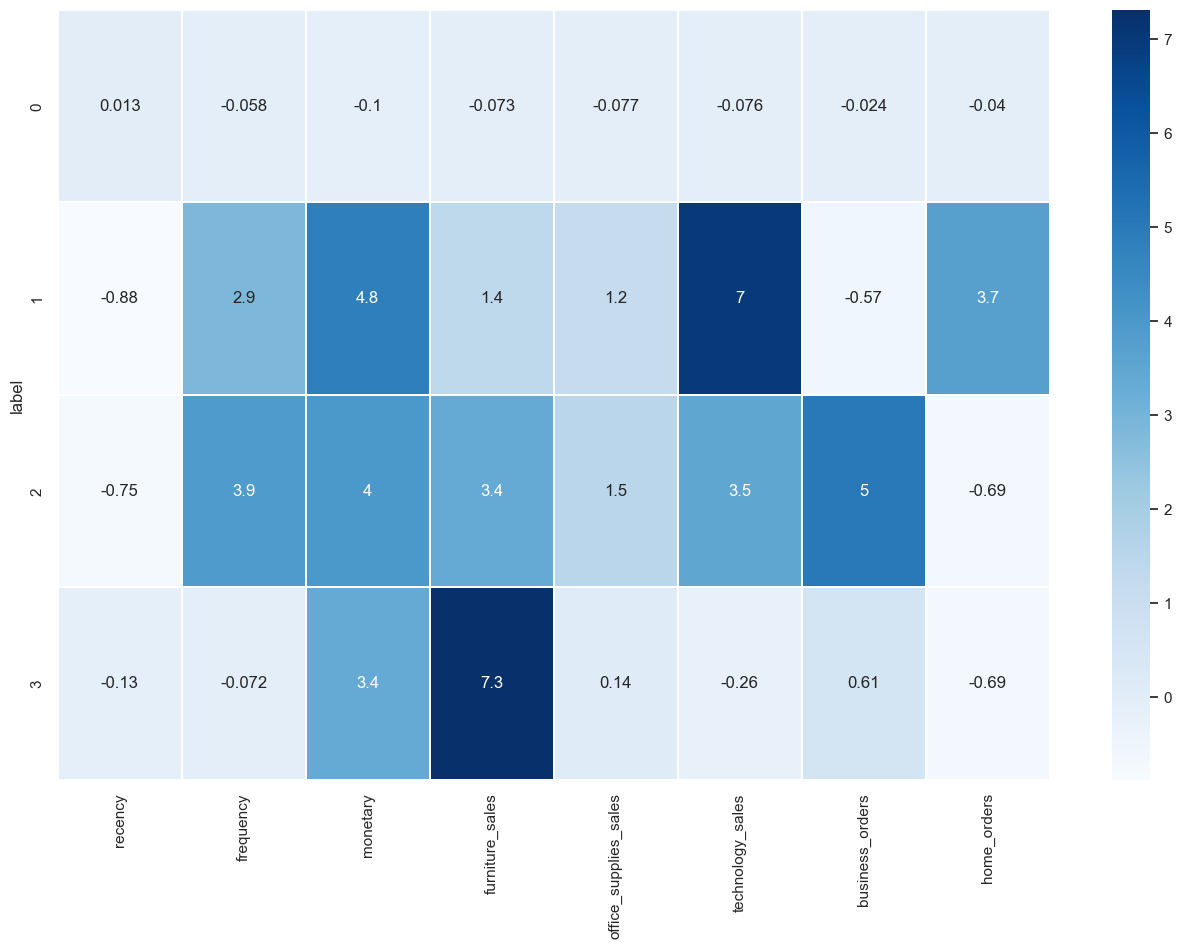

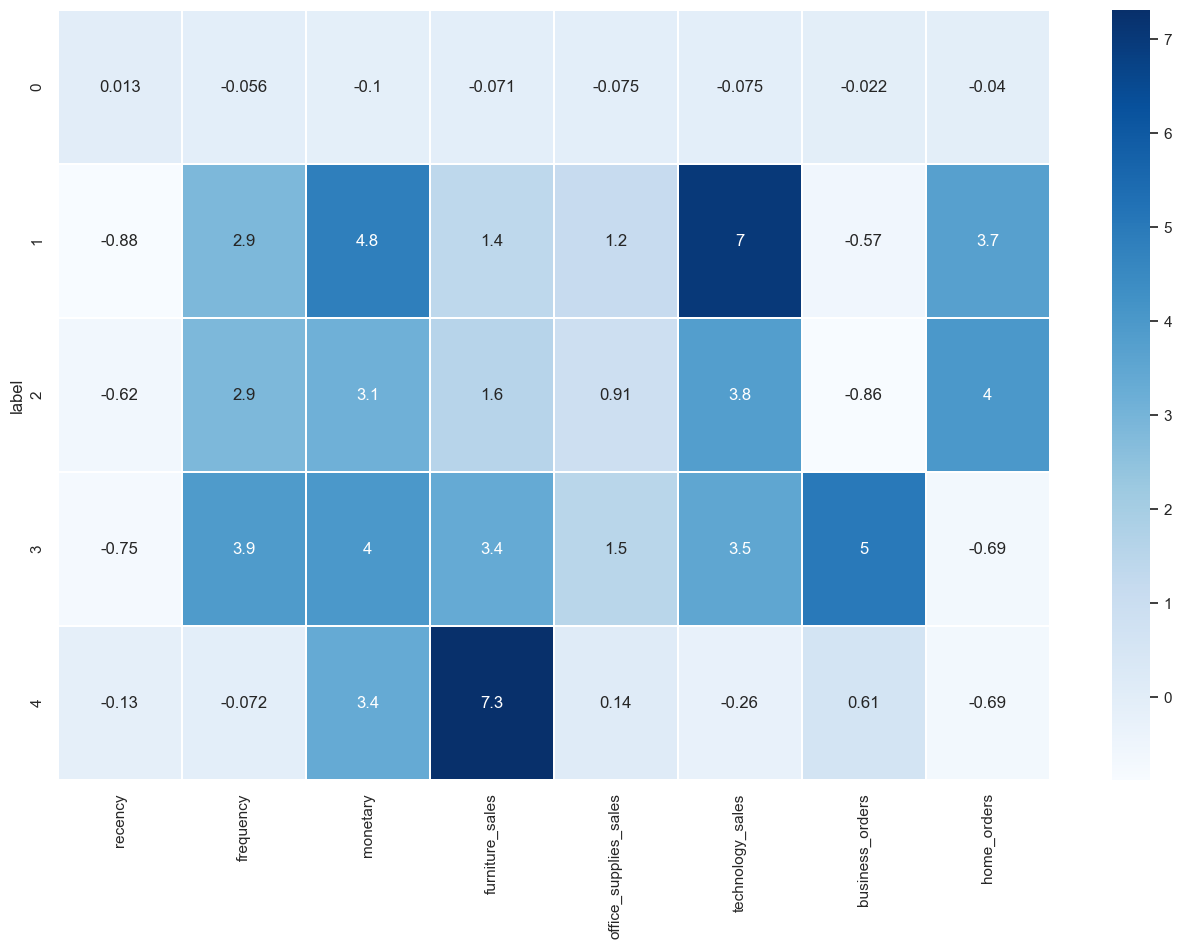

In [53]:
dbscan_customers = []

for eps, min_sample, num in zip(dbscan_df_filtered["eps"], dbscan_df_filtered["min_samples"], dbscan_df_filtered["n_clusters"]):
    dbscan = DBSCAN(eps=eps, min_samples=min_sample).fit(data)
    
    labels = pd.Series(dbscan.labels_, name="label")
    heatmap_df = pd.concat([data, labels], axis=1).groupby("label").mean().query("label != -1")

    plt.figure(figsize=(16, 10))
    sns.heatmap(heatmap_df, annot=True, cmap="Blues", linewidths=0.1);

    dbscan_customers.append([num, dict(Counter(dbscan.labels_))])

In [54]:
dbscan_customers

[[3, {0: 2621, -1: 76, 1: 3, 2: 3}],
 [4, {0: 2656, -1: 41, 1: 2, 2: 2, 3: 2}],
 [5, {0: 2658, -1: 37, 1: 2, 2: 2, 3: 2, 4: 2}]]

## Models Comparison

In [55]:
result = df_filtered.copy()

for category in [kmean_category, agg_category]:
    result = pd.concat([result, category], axis=1)

In [56]:
result.groupby(["kmean_category", "agg_category"]).mean().round(2)

recency  \
kmean_category                                 agg_category                                                  
High-Value, Very Frequent Buyers               High-Value, Frequent Buyers                          132.30   
                                               Very High-Value, Extremely Frequent Buyers           130.83   
Low-Value, Infrequent Buyers with Poor Recency Disengaged Buyers with Very Poor Recency             939.88   
                                               Slightly Engaged Buyers with Moderate Business ...   251.31   
                                               Slightly Engaged Buyers with Moderate Home Orders    473.08   
Moderate Engagement, High Business Orders      Disengaged Buyers with Very Poor Recency             644.62   
                                               High-Value, Frequent Buyers                          194.10   
                                               Slightly Engaged Buyers with Moderate Business ...   184.42   
                                               Slightly Engaged Buyers with Moderate Home Orders    213.10   
Moderate Engagement, High Home Orders          Disengaged Buyers with Very Poor Recency             913.75   
                                               High-Value, Frequent Buyers                          155.03   
                                               Slightly Engaged Buyers with Moderate Business ...    85.40   
                                               Slightly Engaged Buyers with Moderate Home Orders    217.16   

                                                                                                   frequency  \
kmean_category                                 agg_category                                                    
High-Value, Very Frequent Buyers               High-Value, Frequent Buyers                              8.35   
                                               Very High-Value, Extremely Frequent Buyers               9.33   
Low-Value, Infrequent Buyers with Poor Recency Disengaged Buyers with Very Poor Recency                 1.17   
                                               Slightly Engaged Buyers with Moderate Business ...       1.35   
                                               Slightly Engaged Buyers with Moderate Home Orders        1.71   
Moderate Engagement, High Business Orders      Disengaged Buyers with Very Poor Recency                 4.12   
                                               High-Value, Frequent Buyers                              4.67   
                                               Slightly Engaged Buyers with Moderate Business ...       3.82   
                                               Slightly Engaged Buyers with Moderate Home Orders        4.46   
Moderate Engagement, High Home Orders          Disengaged Buyers with Very Poor Recency                 3.00   
                                               High-Value, Frequent Buyers                              4.89   
                                               Slightly Engaged Buyers with Moderate Business ...       3.00   
                                               Slightly Engaged Buyers with Moderate Home Orders        3.75   

                                                                                                   monetary  \
kmean_category                                 agg_category                                                   
High-Value, Very Frequent Buyers               High-Value, Frequent Buyers                         34715.11   
                                               Very High-Value, Extremely Frequent Buyers          56229.93   
Low-Value, Infrequent Buyers with Poor Recency Disengaged Buyers with Very Poor Recency              692.61   
                                               Slightly Engaged Buyers with Moderate Business ...    740.79   
                                               Slightly Engaged Buyers with Moderate Home Orders    3

**Selected model:** k_mean with 4 number of clusters

In [57]:
customers = pd.concat([df, kmean_category], axis=1)
customers.head(10)

,customer_id,recency,frequency,monetary,furniture_sales,office_supplies_sales,technology_sales,business_orders,home_orders,fall_sales,spring_sales,summer_sales,winter_sales,state_or_province,kmean_category
0,2,583,1,5.76,0.00,5.76,0.00,1,0,0.00,5.76,0.00,0.00,Illinois,"Low-Value, Infrequent Buyers with Poor Recency"
1,3,184,4,5250.20,0.00,2150.64,3099.56,4,0,2052.76,0.00,3197.44,0.00,Washington,"Moderate Engagement, High Business Orders"
2,5,599,2,6128.40,6011.76,116.64,0.00,0,2,0.00,116.64,0.00,6011.76,California,"Low-Value, Infrequent Buyers with Poor Recency"
3,6,368,2,3615.80,0.00,1552.04,2063.76,0,2,0.00,1443.84,0.00,2171.96,California,"Moderate Engagement, High Home Orders"
4,7,428,1,233.32,0.00,233.32,0.00,0,1,233.32,0.00,0.00,0.00,Massachusetts,"Low-Value, Infrequent Buyers with Poor Recency"
5,8,372,1,704.90,704.90,0.00,0.00,0,1,0.00,0.00,0.00,704.90,New Hampshire,"Low-Value, Infrequent Buyers with Poor Recency"
6,9,372,1,2294.80,2294.80,0.00,0.00,0,1,0.00,0.00,0.00,2294.80,New Jersey,"Low-Value, Infrequent Buyers with Poor Recency"
7,10,820,1,217.98,0.00,217.98,0.00,0,1,217.98,0.00,0.00,0.00,New Jersey,"Low-Value, Infrequent Buyers with Poor Recency"
8,11,1235,1,208.56,208.56,0.00,0.00,0,1,0.00,0.00,208.56,0.00,New Jersey,"Low-Value, Infrequent Buyers with Poor Recency"
9,12,677,1,87.84,0.00,87.84,0.00,0,1,0.00,0.00,0.00,87.84,Rhode Island,"Low-Value, Infrequent Buyers with Poor Recency"


In [58]:
customers.to_csv("customers.csv", index=False)